In [1]:
from utils import *
from app import *

In [3]:
source, dest, lons, lats, dtime = get_directions('Holländische Reihe 15, Hamburg',
                                                 'Bundesstrasse 53, Hamburg', 'cycling')

In [4]:
df = get_data(lons, lats, dtime)

In [6]:
df2 = pd.DataFrame({'lons': lons, 
               'lats': lats, 
               'dtime': dtime.seconds.values,
               'source':source,
              'destination': dest})

In [16]:
lon_radar, lat_radar, time_radar, dtime_radar, rr = get_radar_data_cached()

In [12]:
df = create_dummy_dataframe()

In [74]:
def make_fig_bars(df):
    if df is not None:
        df = df.rename(columns=lambda s: s.strftime('%H:%M')).sum()
        values = df.values
        labels = [str(value) + ' mm' for value in values.round(1)]
        colors = ['peachpuff' if x == values.min() else 'lightsteelblue' for x in values]

        fig = go.Figure(data=[go.Bar(
            x=df.index, y=values,
            text=labels,
            textposition='auto',
            opacity=1,
            marker_color=colors
        )])

        fig.update_layout(
                          legend_orientation="h",
                          xaxis=dict(title='Leave at..'),
                          yaxis=dict(visible=False),
                          showlegend=False,
                          height=390,
                          margin={"r": 0.1, "t": 0.1, "l": 0.1, "b": 0.1},
                          template='plotly_white',
        )

    return fig


In [75]:
fig = make_fig_bars(df)
fig.show()

In [45]:
fig.data

(Bar({
     'opacity': 0.6,
     'text': [204.0 mm, 229.5 mm, 153.0 mm, 204.0 mm, 255.0 mm],
     'textposition': 'auto',
     'x': array(['12:00', '12:15', '12:30', '12:45', '13:00'], dtype=object),
     'y': array([204. , 229.5, 153. , 204. , 255. ])
 }),)

In [51]:
proj_defs = {
    'euratl':
    {
        'extents':[-23.5, 45, 29.5, 70.5],
        'resolution': '50m',
        'regions':False
    },
    'it':
    {
        'extents':[6, 19, 36, 48],
        'resolution': '10m',
        'regions':True
    },
    'de':
    {
        'extents':[5, 16, 46.5, 56],
        'resolution': '10m',
        'regions':True
    },
        'ham':
    {
        'extents':[9.65, 10.5, 53, 54],
        'resolution': '10m',
        'regions':True
    }
}

import matplotlib.pyplot as plt

def get_projection_cartopy(plt, projection="euratl", compute_projection=False):
    '''Retrieve the projection using cartopy'''
    if compute_projection:
        import cartopy.crs as ccrs
        import cartopy.feature as cfeature
        import cartopy.io.shapereader as shpreader

        proj_opts = proj_defs[projection]

        ax = plt.axes(projection=ccrs.PlateCarree())

        ax.set_extent(proj_opts['extents'], ccrs.PlateCarree())
        ax.coastlines(resolution=proj_opts['resolution'])
        ax.add_feature(cfeature.BORDERS.with_scale(proj_opts['resolution']))

        if proj_opts['regions']:
            states_provinces = cfeature.NaturalEarthFeature(
                category='cultural',
                name='admin_1_states_provinces_lines',
                scale=proj_opts['resolution'],
                facecolor='none')
            ax.add_feature(states_provinces, edgecolor='black', alpha=.5)

        return(ax)
    else:
        return(add_background(plt, projection, image=projection+"_background.png"))

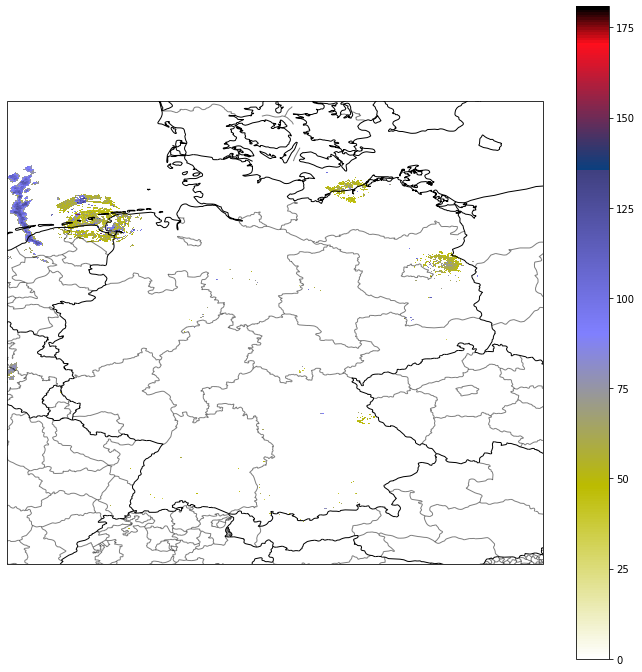

In [55]:
fig = plt.figure(figsize=(12, 12))

lon_radar, lat_radar, time_radar, dtime_radar, rr = get_radar_data_cached()

ax = get_projection_cartopy(plt, projection='de', compute_projection=True)

plt.pcolormesh(lon_radar, lat_radar, rr[0], cmap='gist_stern_r')

plt.colorbar()